# Pymaceuticals Inc.
---

### Analysis

The data shows a clear relationship between mouse weight and tumor volume for the Capomulin regimen. As mouse weight increases, tumor volume tends to rise, as indicated by the positive correlation coefficient. The linear regression model confirms this trend, suggesting that for each unit increase in weight, tumor volume increases on average. These findings highlight the importance of weight management alongside Capomulin treatment for controlling tumor growth. Further research is needed to understand any additional factors contributing to the outcomes and to develop more customized treatments.




 

In [458]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import sem
from scipy.stats import pearsonr, linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
merged_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [459]:
# Checking the number of mice.
mice_count = merged_data["Mouse ID"].nunique()

print(mice_count)

249


In [460]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Find duplicate rows based on both 'Mouse ID' and 'Timepoint'
duplicate_mice = merged_data[merged_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the unique duplicate Mouse IDs
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [461]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = merged_data[merged_data['Mouse ID'].isin(duplicate_mouse_ids)]

duplicate_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26


In [462]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = merged_data.drop_duplicates(subset='Mouse ID')
clean_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
245,t565,0,45.0,0,Capomulin,Female,20,17
246,i557,0,45.0,0,Capomulin,Female,1,24
247,m957,0,45.0,0,Capomulin,Female,3,19
248,f966,0,45.0,0,Capomulin,Male,16,17


In [463]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_df["Mouse ID"].count()
clean_mice_count

249

## Summary Statistics

In [464]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Combine the results into a DataFrame
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
std_deviation = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem_value = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(sem)

# Assemble the resulting series into a single summary DataFrame.
summary_stats = pd.DataFrame({
    'Mean': mean,
    'Median': median,
    'Variance': variance,
    'Standard Deviation': std_deviation,
    'SEM': sem_value
})

summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err']
# Displaying the summary statistics table
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [465]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', sem])
summary_stats.columns = ['Mean Tumor Volume', 'Median Tumor Volume', 'Tumor Volume Variance', 'Tumor Volume Std. Dev.', 'Tumor Volume Std. Err']
summary_stats

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

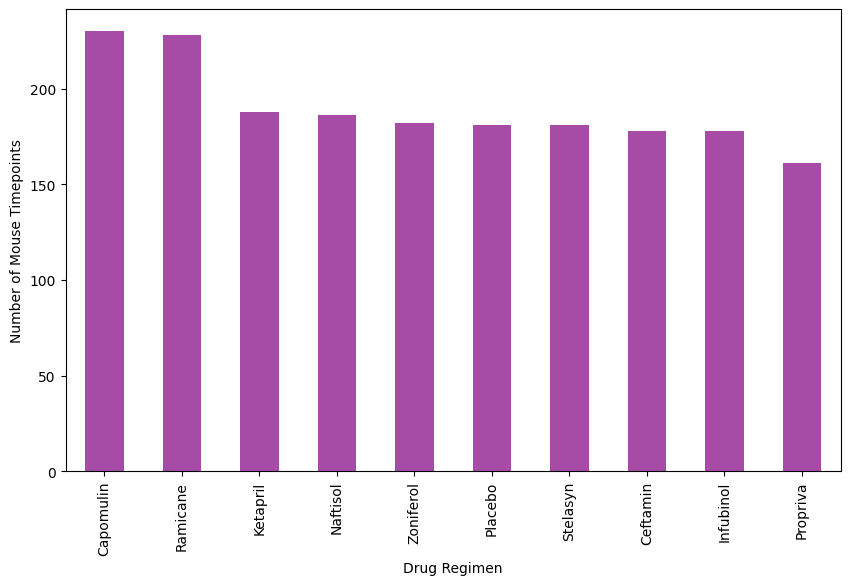

In [466]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
regimen_counts = merged_data.groupby('Drug Regimen').size()
regimen_counts = regimen_counts.sort_values(ascending=False)
regimen_counts.plot(kind='bar', figsize=(10, 6), color='purple', alpha=0.7)

plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse Timepoints')

plt.show()

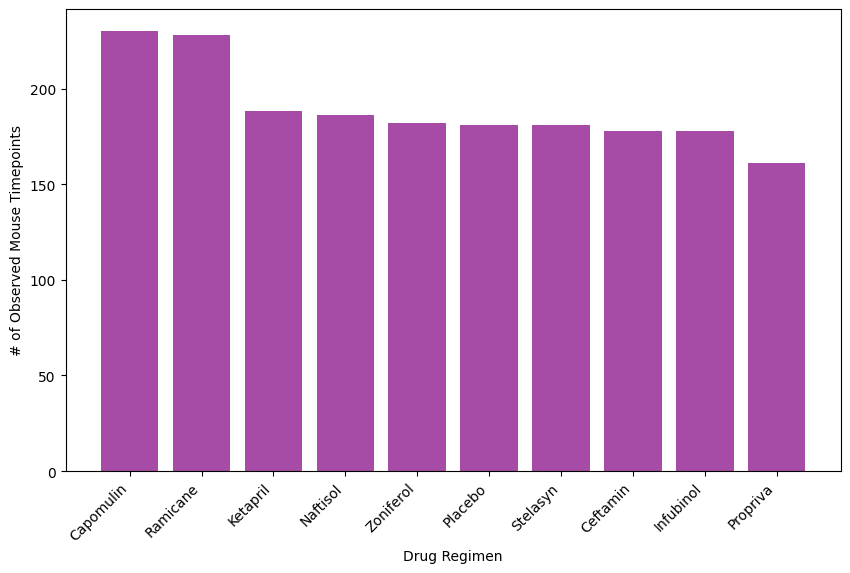

In [467]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimen_counts = merged_data.groupby('Drug Regimen').size()
regimen_counts = regimen_counts.sort_values(ascending=False)

# Extract drug regimens and corresponding counts
regimens = regimen_counts.index
counts = regimen_counts.values

plt.figure(figsize=(10, 6))
plt.bar(regimens, counts, color='purple', alpha=0.7)

plt.xticks(rotation=45, ha='right')

# Set labels
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')

plt.show()

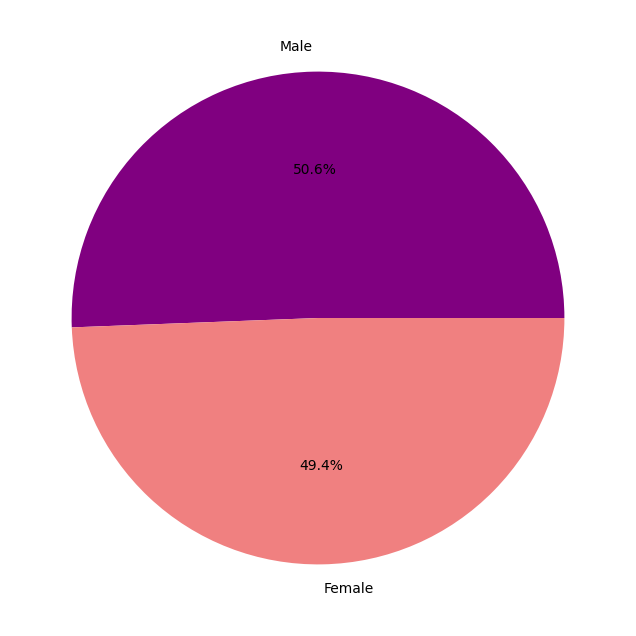

In [468]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Count the number of female and male mice
sex_distribution = merged_data['Sex'].value_counts()
sex_distribution.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', colors=['purple', 'lightcoral'], ylabel='')

plt.show()

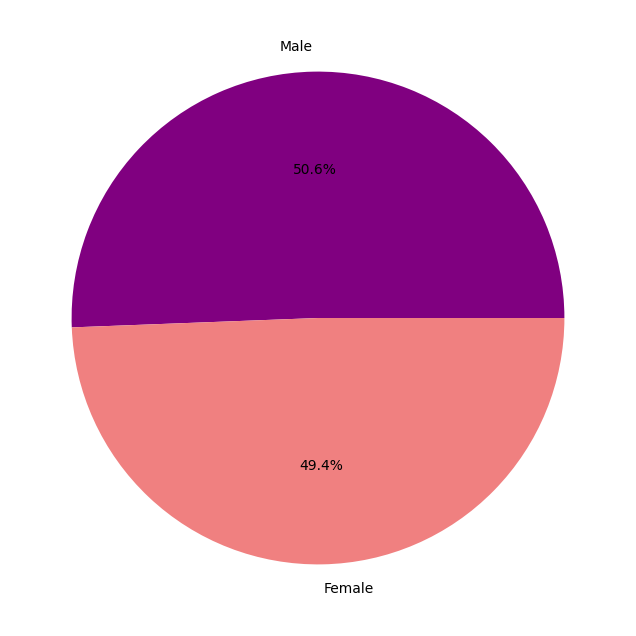

In [469]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_distribution = merged_data['Sex'].value_counts()

# Create labels
labels = sex_distribution.index

sizes = sex_distribution.values
colors = ['purple', 'lightcoral']

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')

plt.show()

## Quartiles, Outliers and Boxplots

In [470]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin    

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = merged_data.groupby('Mouse ID')['Timepoint'].max().reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(max_timepoint, merged_data, on=['Mouse ID', 'Timepoint'])

specified_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = merged_df[merged_df['Drug Regimen'].isin(specified_treatments)]

final_tumor_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
3,a275,45,62.999356,3,Ceftamin,Female,20,28
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
...,...,...,...,...,...,...,...,...
239,y769,45,68.594745,4,Ceftamin,Female,6,27
240,y793,45,31.896238,2,Capomulin,Male,17,17
241,y865,45,64.729837,3,Ceftamin,Male,23,26
245,z578,45,30.638696,0,Ramicane,Male,11,16


In [471]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = merged_df['Drug Regimen'].unique()

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers.     
    # Locate the rows which contain mice on each drug and get the tumor volumes
for treatment in treatments:
    tumor_vol = merged_data.loc[merged_data['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # add subset 
    tumor_vol_data.append(tumor_vol)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_vol.quantile([0.25, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    potential_outliers = tumor_vol.loc[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
potential_outliers
    

1652    25.472143
1849    23.343598
Name: Tumor Volume (mm3), dtype: float64

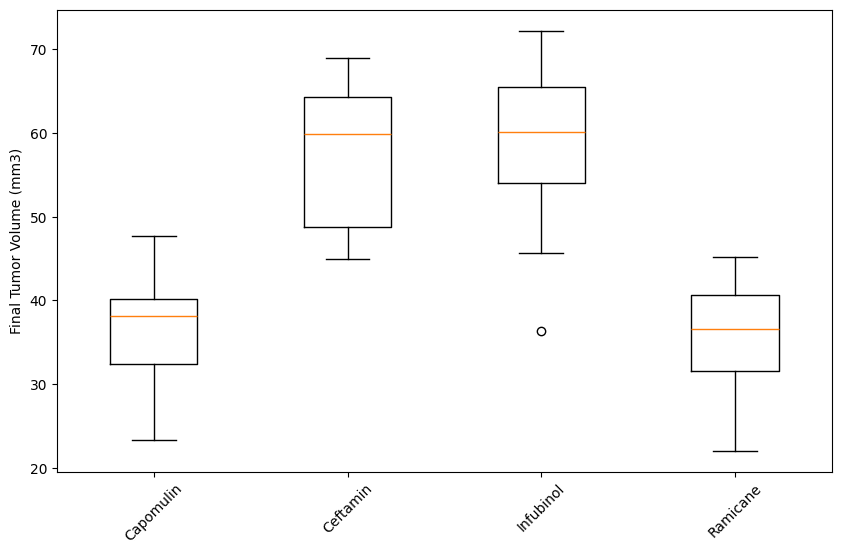

In [472]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
grouped_df = final_tumor_volume.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)

# Create a boxplot
plt.figure(figsize=(10, 6))
plt.boxplot(grouped_df.values)
plt.xticks(range(1, len(grouped_df) + 1), grouped_df.index, rotation=45)
plt.ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

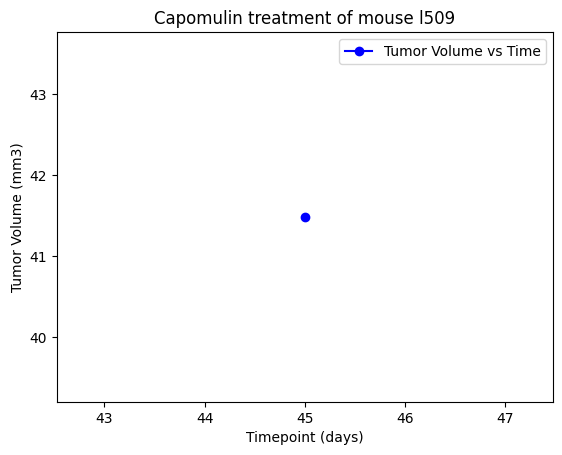

In [473]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
single_mouse_data = merged_df[(merged_df['Drug Regimen'] == 'Capomulin') & (final_tumor_volume['Mouse ID'] == 'l509')]

plt.plot(single_mouse_data['Timepoint'], single_mouse_data['Tumor Volume (mm3)'], marker='o', color='b', label='Tumor Volume vs Time')
plt.title('Capomulin treatment of mouse l509')
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.legend()
plt.show()

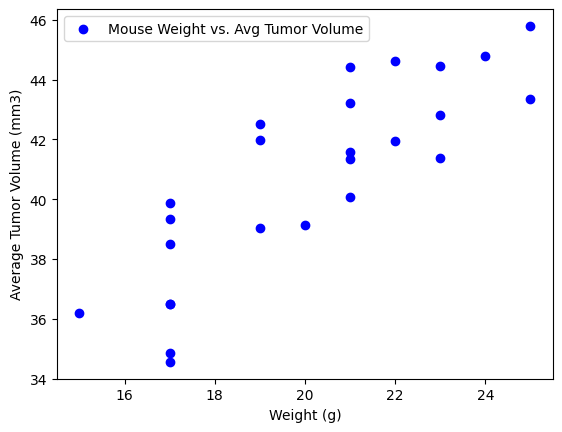

In [474]:
# Filter data for the Capomulin regimen
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the original data to get mouse weights
merged_data = pd.merge(capomulin_data, average_tumor_volume, on='Mouse ID')
merged_data = merged_data.rename(columns={'Tumor Volume (mm3)_y': 'Average Tumor Volume'})

# Remove duplicate rows to keep only unique mouse weight and average tumor volume pairs
unique_data = merged_data.drop_duplicates(subset=['Mouse ID', 'Weight (g)', 'Average Tumor Volume'])

plt.scatter(unique_data['Weight (g)'], unique_data['Average Tumor Volume'], color='b', label='Mouse Weight vs. Avg Tumor Volume')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()
plt.show()

## Correlation and Regression

In [475]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

capomulin_data = merged_df[merged_df['Drug Regimen'] == 'Capomulin']

# Group by 'Mouse ID' and calculate average tumor volume and weight
avg_data = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'}).reset_index()

# Calculate correlation coefficient
correlation_coefficient, p_value = pearsonr(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])
print("Correlation Coefficient:", correlation_coefficient)

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'])
print("Slope:", slope)
print("Intercept:", intercept)
print("R-squared:", r_value**2)



Correlation Coefficient: 0.8767060403658116
Slope: 1.750468228958504
Intercept: 1.4481469525549002
R-squared: 0.7686134812139006


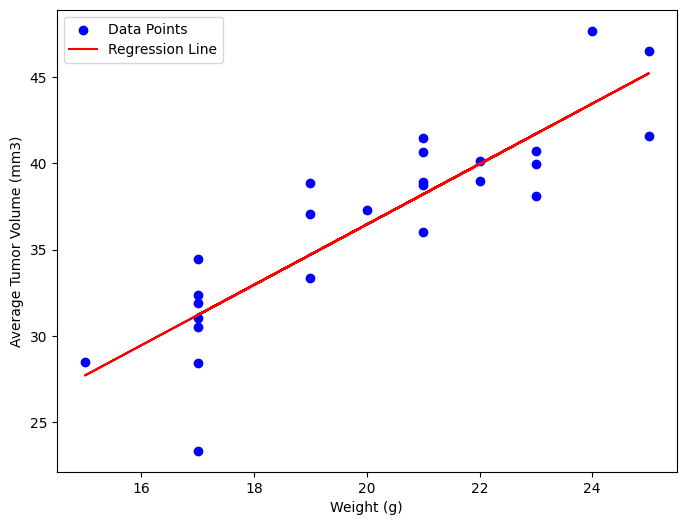

In [476]:
# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(avg_data['Weight (g)'], avg_data['Tumor Volume (mm3)'], color='blue', label='Data Points')

# Add regression line
plt.plot(avg_data['Weight (g)'], intercept + slope * avg_data['Weight (g)'], color='red', label='Regression Line')

# Labeling axes and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

# Show plot
plt.show()